# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('diabetes_prediction_dataset-1.csv')

In [5]:
print(df.head())
print(df.isnull().sum())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [6]:
desc_stats = df.describe()
print(desc_stats)

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [8]:
medians = df.select_dtypes(include=['float64', 'int64']).median()
print("Медианы:\n", medians)

variances = df.select_dtypes(include=['float64', 'int64']).var()
print("Дисперсии:\n", variances)


Медианы:
 age                     43.00
hypertension             0.00
heart_disease            0.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
diabetes                 0.00
dtype: float64
Дисперсии:
 age                     507.008078
hypertension              0.069248
heart_disease             0.037866
bmi                      44.046894
HbA1c_level               1.146339
blood_glucose_level    1657.152341
diabetes                  0.077776
dtype: float64


In [10]:
mins = df.select_dtypes(include=['float64', 'int64']).min()
maxs = df.max()

std_devs = df.select_dtypes(include=['float64', 'int64']).std()

print("Минимумы:\n", mins)
print("Максимумы:\n", maxs)
print("Стандартные отклонения:\n", std_devs)


Минимумы:
 age                     0.08
hypertension            0.00
heart_disease           0.00
bmi                    10.01
HbA1c_level             3.50
blood_glucose_level    80.00
diabetes                0.00
dtype: float64
Максимумы:
 gender                       Other
age                           80.0
hypertension                     1
heart_disease                    1
smoking_history        not current
bmi                          95.69
HbA1c_level                    9.0
blood_glucose_level            300
diabetes                         1
dtype: object
Стандартные отклонения:
 age                    22.516840
hypertension            0.263150
heart_disease           0.194593
bmi                     6.636783
HbA1c_level             1.070672
blood_glucose_level    40.708136
diabetes                0.278883
dtype: float64


**Вывод:** Средний возраст пациентов составляет около 41.9 года, с небольшой долей имеющих гипертонию (7.5%) и сердечно-сосудистые заболевания (3.9%). Средний индекс массы тела (ИМТ) находится на уровне 27.3, что указывает на избыточный вес, в то время как уровень HbA1c и уровень глюкозы в крови средние значения составляют 5.53% и 138.1 соответственно, что может указывать на предрасположенность к диабету. Около 8.5% пациентов имеют диагноз диабет.

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [12]:
duplicates = df.duplicated()
print("Количество дубликатов:", duplicates.sum())

df_cleaned = df.drop_duplicates()
print("Количество дубликатов после удаления:", df_cleaned.duplicated().sum())


Количество дубликатов: 3854
Количество дубликатов после удаления: 0


### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [13]:
missing_values = df.isnull().sum()
print("Количество отсутствующих значений в каждом столбце:\n", missing_values)

Количество отсутствующих значений в каждом столбце:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [14]:
print("Типы данных в датасете:\n", df.dtypes)


Типы данных в датасете:
 gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

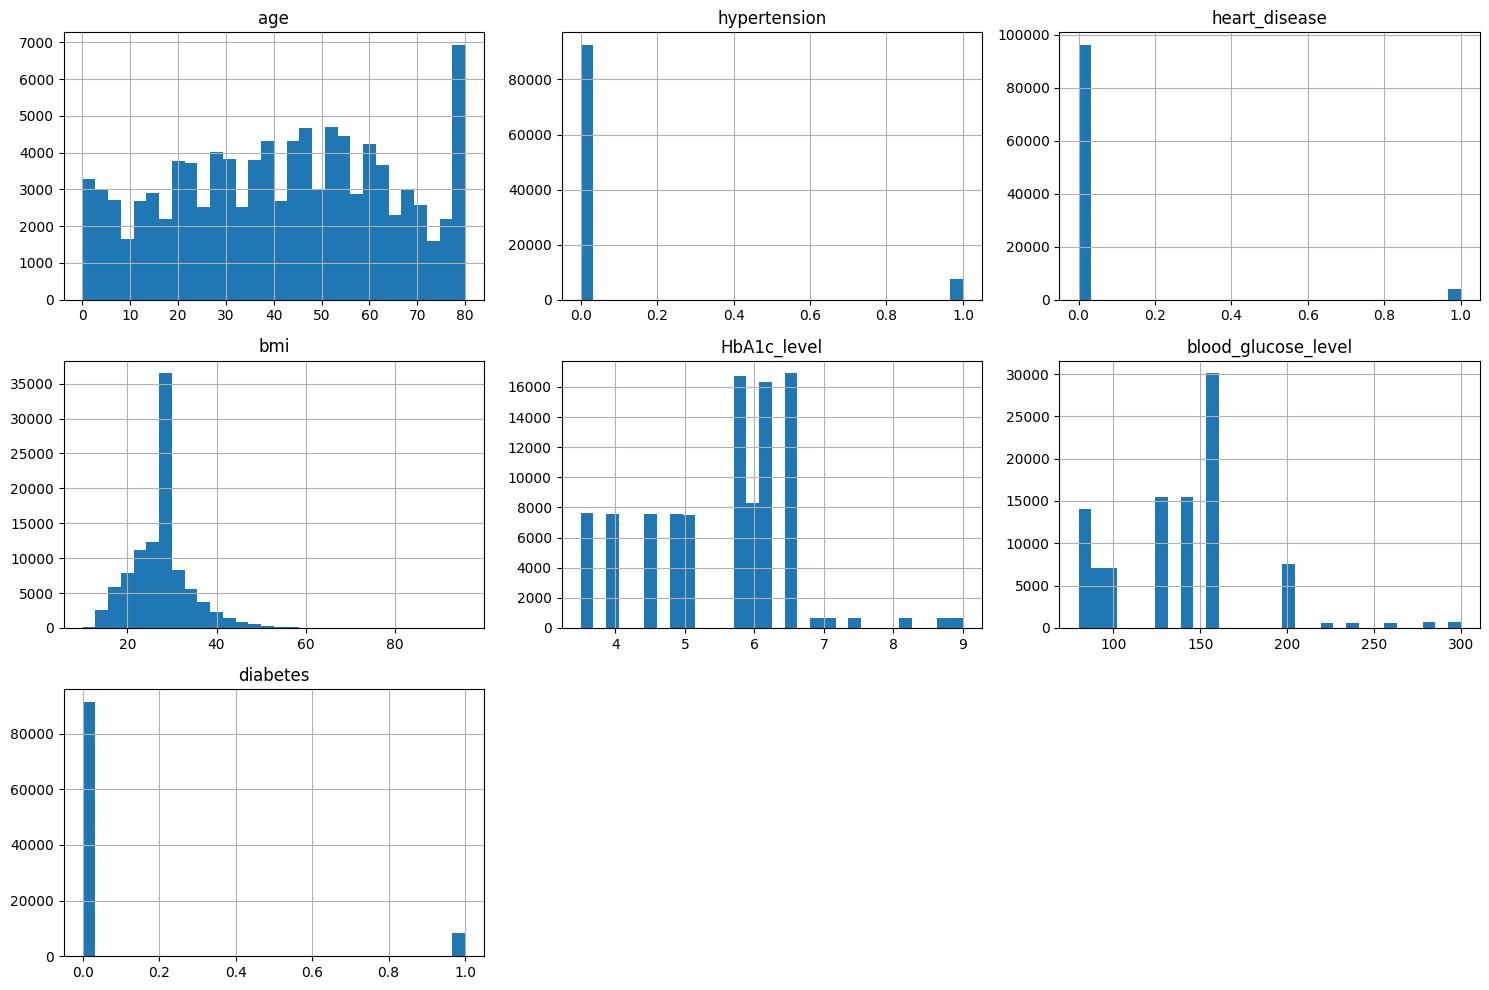

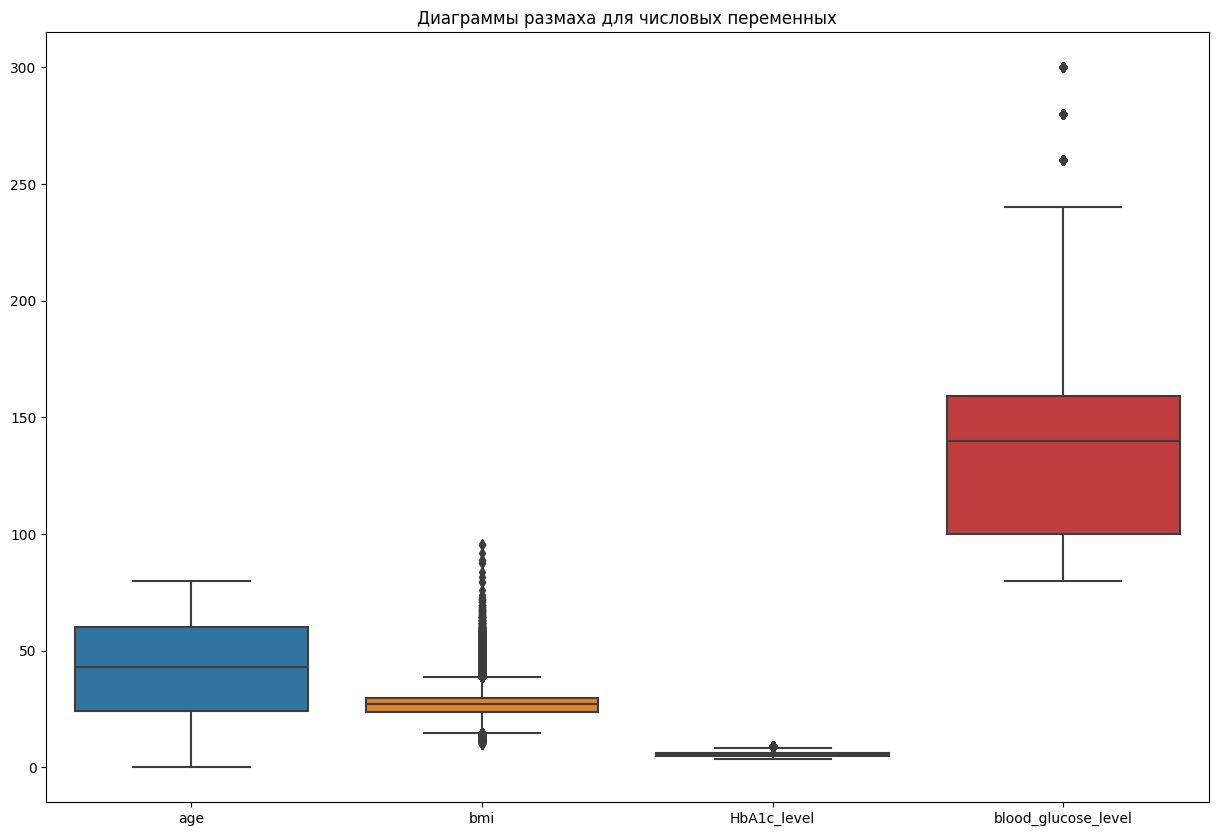

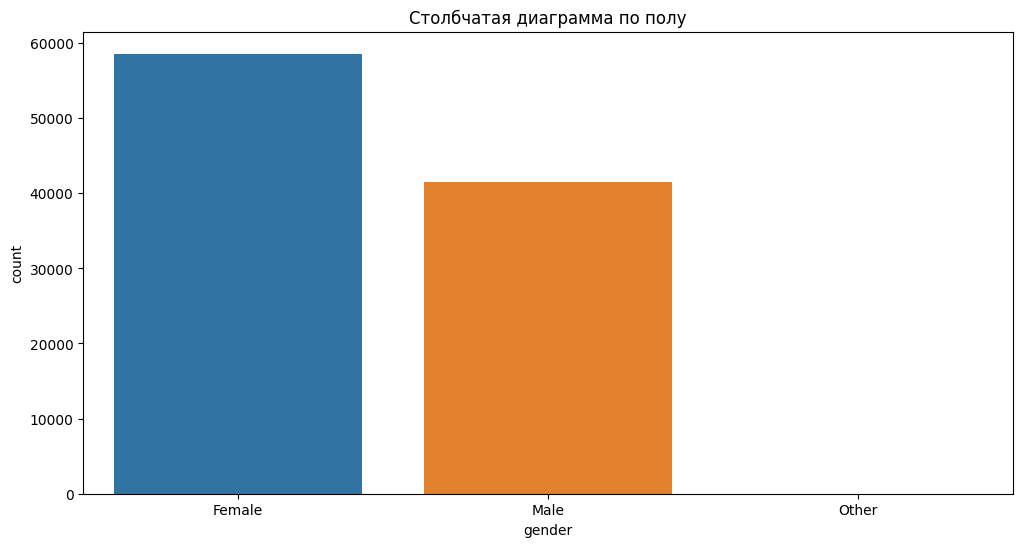

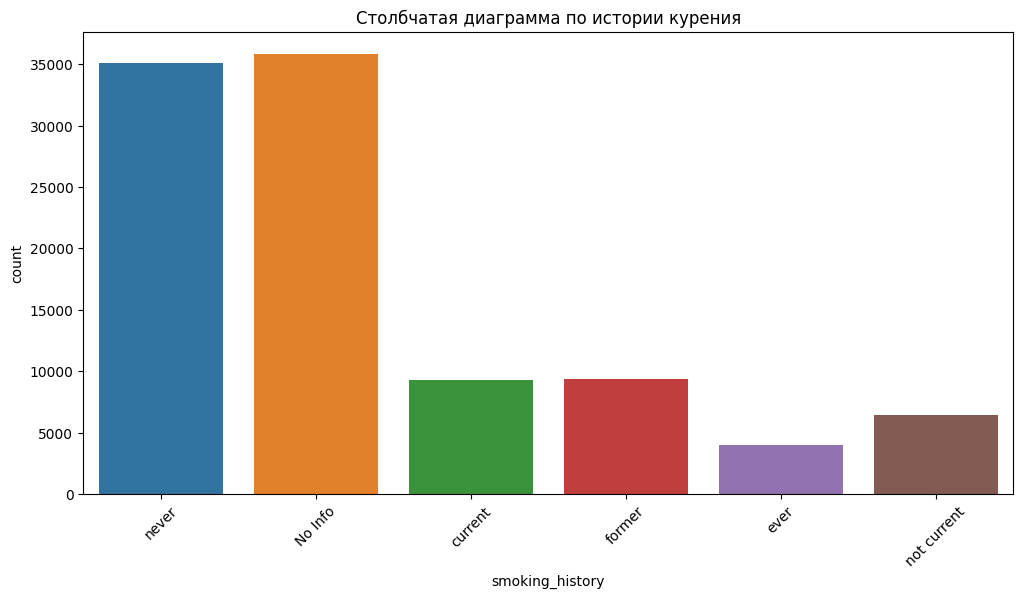

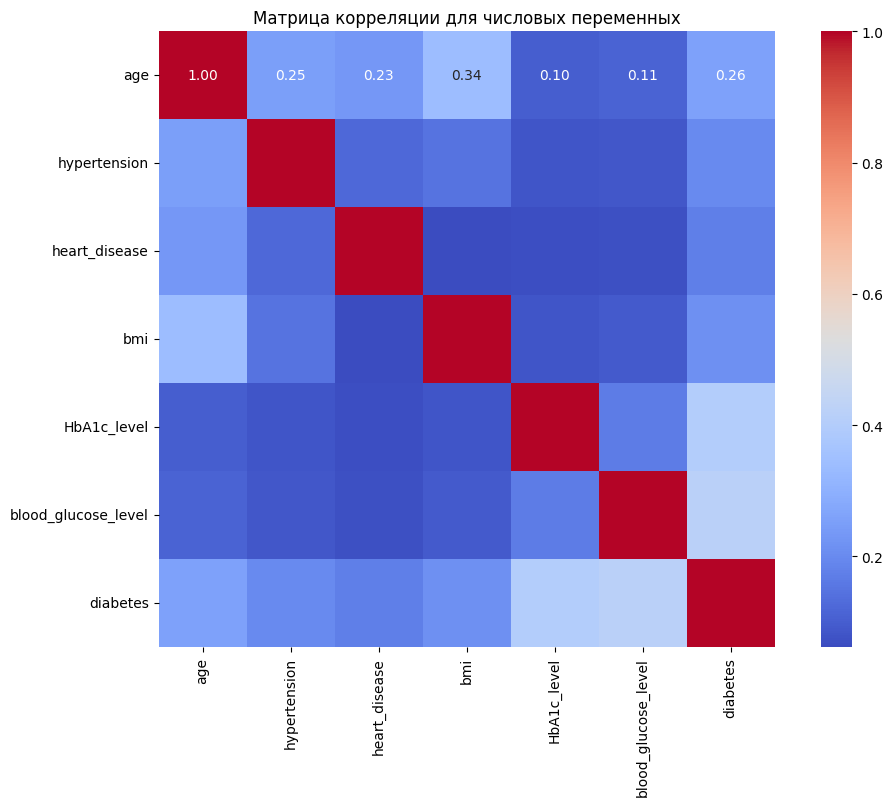

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.title('Диаграммы размаха для числовых переменных')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender')
plt.title('Столбчатая диаграмма по полу')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='smoking_history')
plt.title('Столбчатая диаграмма по истории курения')
plt.xticks(rotation=45)
plt.show()

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции для числовых переменных')
plt.show()
plt.show()

**Вывод:** В выборке представлены медицинские и демографические данные пациентов, включая возраст, индекс массы тела (BMI), уровень HbA1c и уровень глюкозы в крови. Средний возраст составляет 42 года, а средний BMI — 27.32, что указывает на тенденцию к избыточному весу среди участников. Также наблюдаются случаи гипертонии и сердечных заболеваний, что характерно для старших возрастных групп.

Корреляционный анализ выявил несколько значимых зависимостей. Например, возраст связан с повышенным риском гипертонии и сердечных заболеваний, а высокий BMI коррелирует с повышенной вероятностью диабета. Сильная связь между уровнями HbA1c и глюкозы подтверждает их влияние на риск развития диабета.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

In [18]:
diabetes_positive = df[df['diabetes'] == 1]
diabetes_negative = df[df['diabetes'] == 0]

C:\Users\rahat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


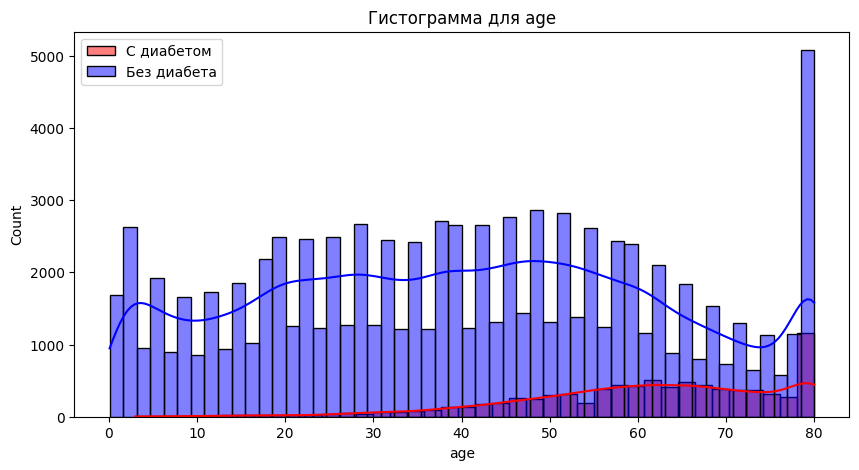

C:\Users\rahat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


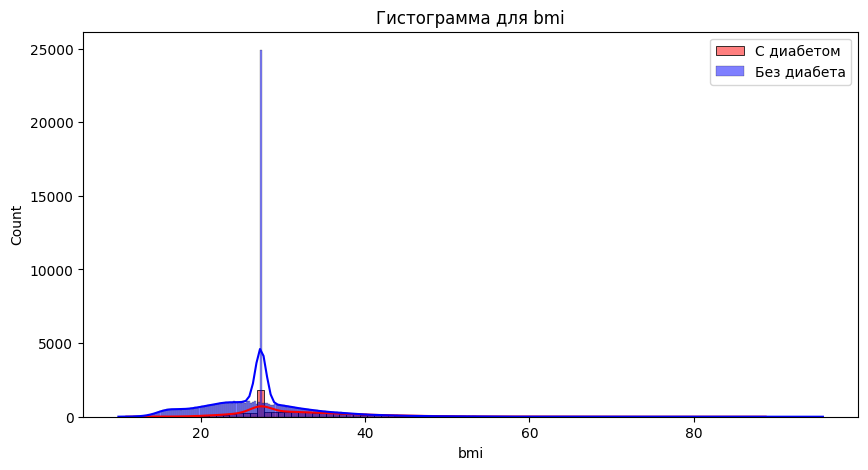

C:\Users\rahat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


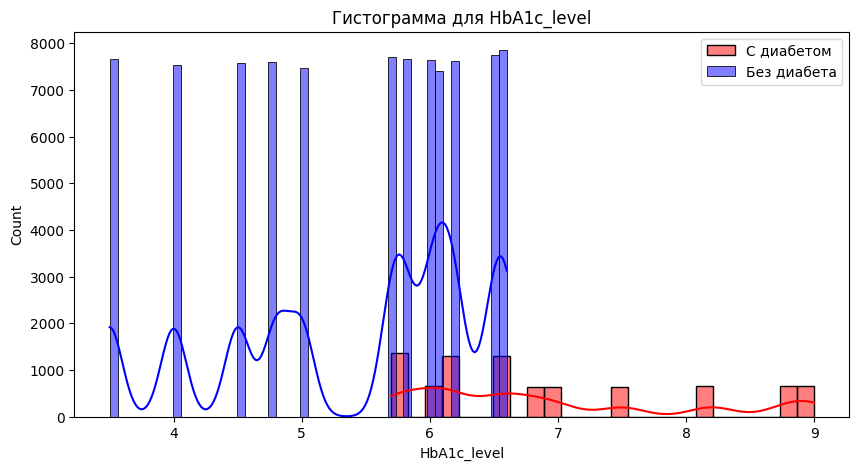

C:\Users\rahat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


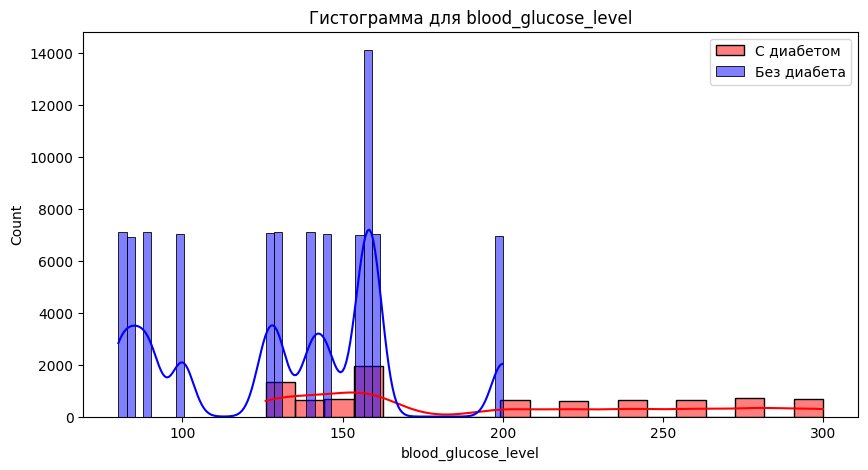

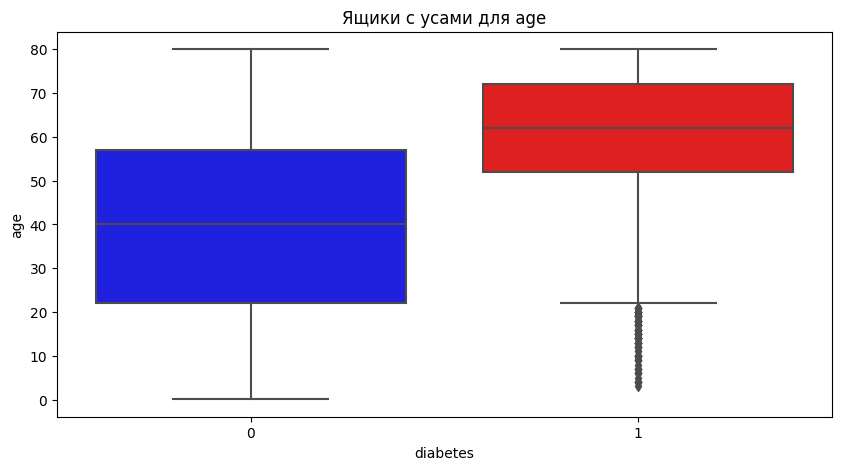

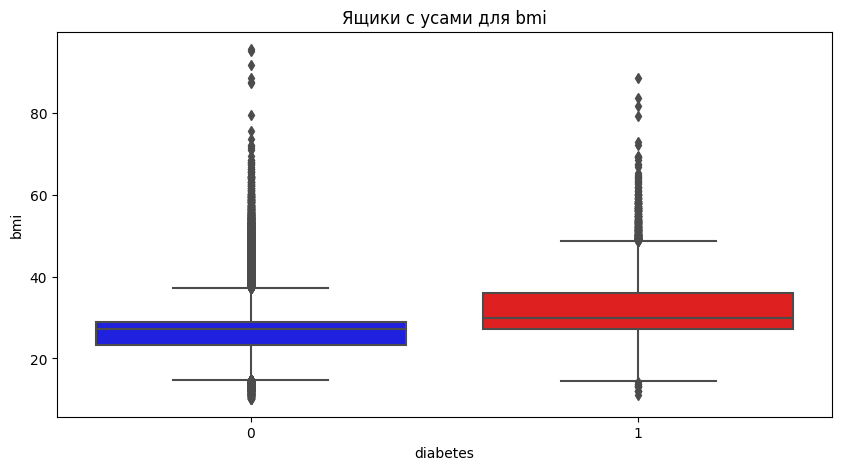

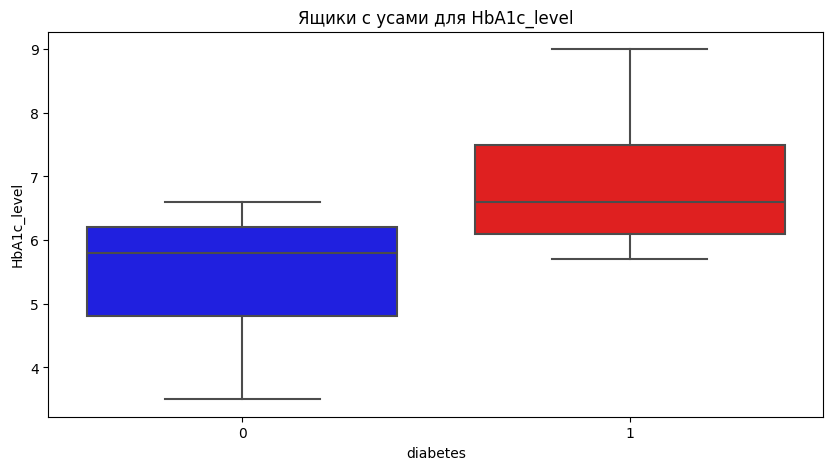

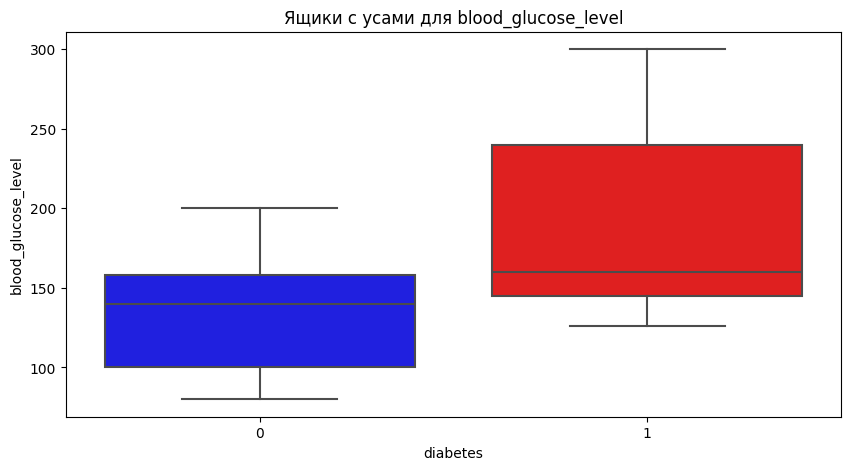

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(diabetes_positive[column], color='red', label='С диабетом', kde=True)
    sns.histplot(diabetes_negative[column], color='blue', label='Без диабета', kde=True)
    plt.title(f'Гистограмма для {column}')
    plt.legend()
    plt.show()

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='diabetes', y=column, data=df, palette=['blue', 'red'])
    plt.title(f'Ящики с усами для {column}')
    plt.show()


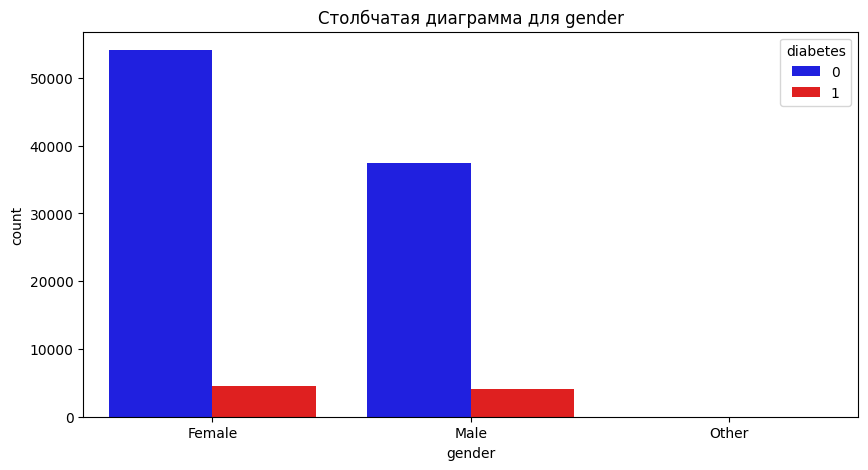

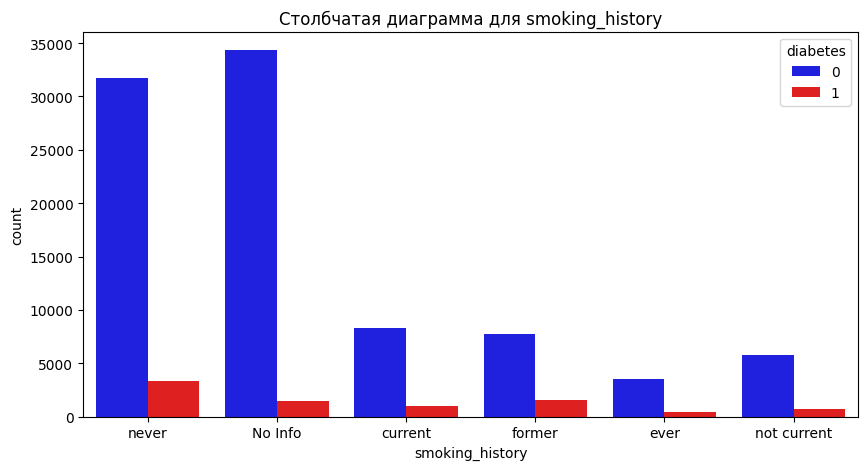

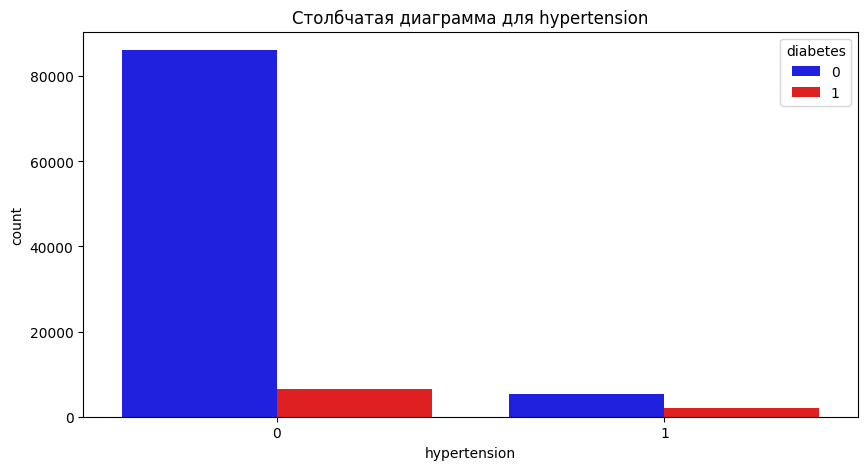

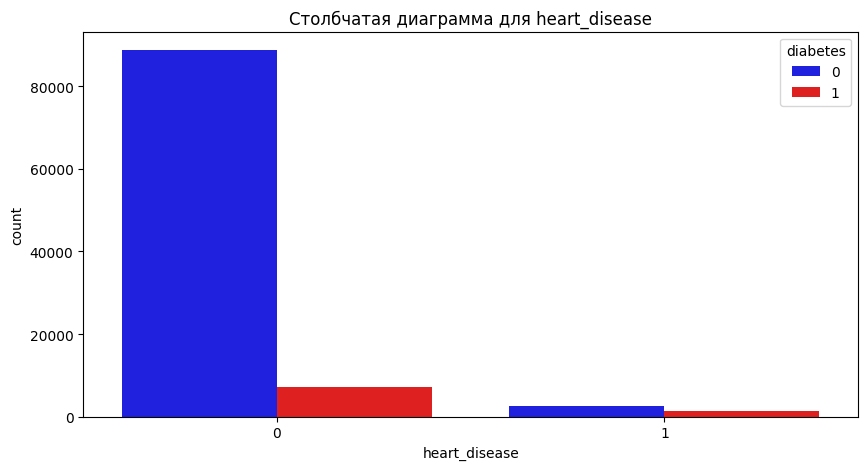

In [20]:
categorical_columns = ['gender', 'smoking_history', 'hypertension', 'heart_disease']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, hue='diabetes', data=df, palette=['blue', 'red'])
    plt.title(f'Столбчатая диаграмма для {column}')
    plt.show()


**Вывод:** Люди с диабетом имеют в среднем более высокий возраст, индекс массы тела (BMI), уровень HbA1c и уровень глюкозы по сравнению с людьми без диабета. Это подтверждается как на гистограммах, так и на ящиках с усами, где значения у людей с диабетом смещены в сторону более высоких уровней.
У людей с диабетом чаще наблюдаются гипертония и сердечные заболевания, что видно на столбчатых диаграммах. Эти состояния также являются ключевыми факторами риска для диабета.

# Общий вывод

#### Опишите данные и результат исследования, основываясь на предыдущих шагах:
Основные выводы:
##### Числовые признаки: Люди с диабетом, как правило, старше, имеют более высокий индекс массы тела, повышенные уровни HbA1c и глюкозы по сравнению с людьми без диабета. Это подтверждается на гистограммах и диаграммах размаха, где значения у диабетиков более смещены в сторону высоких уровней.
##### Категориальные признаки: Гипертония и сердечные заболевания чаще встречаются у людей с диабетом. Однако по таким признакам, как пол и история курения, значительных различий не выявлено.

Данные подтверждают наличие четких зависимостей между риском развития диабета и такими факторами, как возраст, BMI, уровень HbA1c и глюкозы. Также важную роль играют сопутствующие заболевания, такие как гипертония и сердечные заболевания. 